# Tarea 
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

In [7]:
# Librería de optimización 
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook
%matplotlib inline

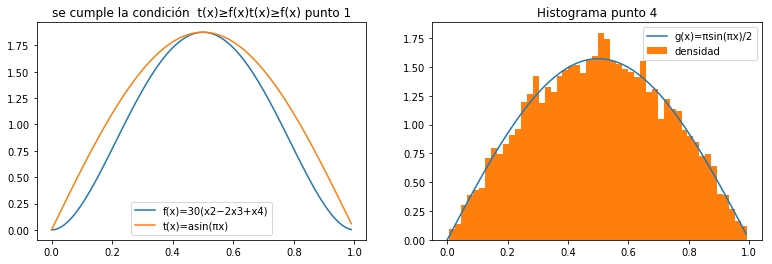

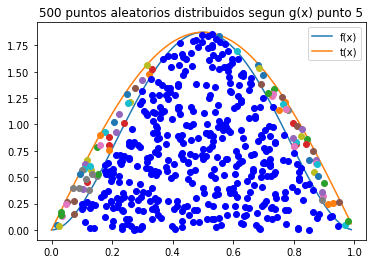

In [20]:
def g(N:'Numero de aleatorios que se desean generar'):
    return np.arccos(2*np.random.uniform(-np.pi/2,np.pi/2,N)/np.pi)/np.pi

N = 500 # número de puntos a simular
# Función objetivo 
f = lambda x: 30*(x**2 - 2*x**3 +x**4)
# Máximo de la función f
a = f(optimize.fmin(lambda x: -f(x),0,disp=False))
# Función t función que mayora a f
t = lambda x:a*np.sin(np.pi*x)
plt.figure(1,figsize=[13,4])
plt.subplot(121)
x = np.arange(0,1,0.01)
plt.plot(x,f(x),label='f(x)=30(x2−2x3+x4)')
plt.plot(x,t(x),label='t(x)=asin(πx)')
plt.legend()
plt.title('se cumple la condición  t(x)≥f(x)t(x)≥f(x) punto 1')
plt.subplot(122)
G = lambda x: np.pi*np.sin(np.pi*x)/2
R1 = g(10000)
x = np.arange(0,1,0.01)
plt.plot(x,G(x),label='g(x)=πsin(πx)/2')
plt.hist(R1,50,density=True,label='densidad')
plt.legend()
plt.title('Histograma punto 4')
plt.figure(2,figsize=[13,4])
plt.subplot(121)
# Gráficas de las funciones
x = np.arange(0,1,0.01)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
plt.title('500 puntos aleatorios distribuidos segun g(x) punto 5')
# Validación del método
R1 = g(N) #Variables distribuidas como g(x)
R2 = np.random.rand(N) #Variables distruidas U~U(0,1)
f_x = f(R1)
t_x = t(R1)
condicion = np.multiply(R2,t_x) <= f_x
for i in range(N):
    if condicion[i]:
        plt.plot(R1[i],R2[i]*t_x[i],'ob')
    else:
        plt.plot(R1[i],R2[i]*t_x[i],'o')
plt.show()
print('Porcentaje de aceptacion con t(x) como pulso senoidal: ',np.count_nonzero(condicion)/np.size(condicion))

# Punto 2
>Para maximizar la funcion:
>$$f(x)=30(x^2-2x^3+x^4)$$
Usaremos la funcion:
>$$t(x)=a \sin(\pi x)$$
Sabemos que:
De acuerdo a esta función $f(x)$ el método propone los siguientes pasos. Asuma que podemos encontrar una función $t(x)$ tal que
$$t(x)\geq f(x), \quad \forall x$$
Note que la función $t(x)\geq 0$  no es una PDF debido a 
$$\int_{-\infty}^{\infty}t(x)dx\geq \int_{-\infty}^{\infty}f(x)dx =1$$
Tomemos
$$c=\int_{-\infty}^{\infty}t(x)\geq 1$$
Por lo tanto
>$$c=\int_{1}^{0}a \sin(\pi x)$$
Resolvemos:
>$$c=\left.\frac{-a}{\pi}\cos(\pi x)\right|_{0}^{1}$$
>$$c=\frac{a}{\pi}(-1-(-1))$$
>$$c=\frac{2a}{\pi}$$
definamos la función $g(x)=t(x)/c \rightarrow g(x)$ **es una densidad**. Resultando entonces 
$$\frac{f(x)}{g(x)}\leq c,\quad \forall x$$
Por lo tanto
$$g(x)=t(x)/c$$
Sustituimos
$$g(x)=\frac{a \sin(\pi x)}{\frac{2a}{\pi}}$$
Simplificamos
$$g(x)=\frac{\pi \sin(\pi x)}{2}$$


# Con lo cual encontramos la funcion g(x) = $\frac{\pi \sin(\pi x)}{2}$


# Punto 3
>Para distribuir los numeros aleatorios segun una funcion de densidad usaremos la inversa de la funcion $g(x)=\frac{\pi \sin(\pi x)}{2}$

>Despejaremos para y:
$$y=\frac{\pi \sin(\pi x)}{2}$$
$$\frac{1}{\pi}\arcsin(\frac{2y}{\pi})=x$$



Porcentaje de aceptacion con t(x) como pulso senoidal:  0.81


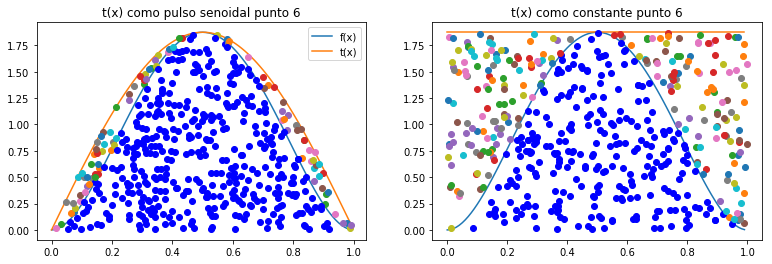

Porcentaje de aceptacion con t(x) como constante:  0.526


In [57]:
def g(N:'Numero de aleatorios que se desean generar'):
    return np.arccos(2*np.random.uniform(-np.pi/2,np.pi/2,N)/np.pi)/np.pi

N = 500 # número de puntos a simular
# Función objetivo 
f = lambda x: 30*(x**2 - 2*x**3 +x**4)
# Máximo de la función f
a = f(optimize.fmin(lambda x: -f(x),0,disp=False))
# Función t función que mayora a f
t = lambda x:a*np.sin(np.pi*x)

plt.figure(1,figsize=[13,4])
plt.subplot(121)
x = np.arange(0,1,0.01)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
plt.title('t(x) como pulso senoidal punto 6')
# Validación del método
R1 = g(N) #Variables distribuidas como g(x)
R2 = np.random.rand(N) #Variables distruidas U~U(0,1)
f_x = f(R1)
t_x = t(R1)
condicion = np.multiply(R2,t_x) <= f_x
for i in range(N):
    if condicion[i]:
        plt.plot(R1[i],R2[i]*t_x[i],'ob')
    else:
        plt.plot(R1[i],R2[i]*t_x[i],'o')
print('Porcentaje de aceptacion con t(x) como pulso senoidal: ',np.count_nonzero(condicion)/np.size(condicion))

plt.subplot(122)
N = 500  # número de puntos
# Función objetivo
f = lambda x: 30*(x**2 - 2*x**3 +x**4)
x = np.arange(0,1,0.01)
c = float(f(optimize.fmin(lambda x:-f(x),0,disp=False)))
t = lambda x: c*np.ones(len(x))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.title('t(x) como constante punto 6')

R2 = np.random.rand(N)
R1 = np.random.rand(N)
f_x = f(R1)
t_x = t(R1)
condicion = np.multiply(R2,t_x) <= f_x
for i in range(N):
    if condicion[i]:
        plt.plot(R1[i],R2[i]*t_x[i],'ob')
    else:
        plt.plot(R1[i],R2[i]*t_x[i],'o')
plt.show()


print('Porcentaje de aceptacion con t(x) como constante: ',np.count_nonzero(condicion)/np.size(condicion))

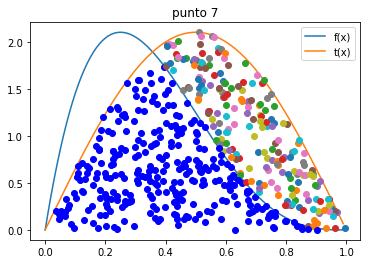

In [61]:
def g(N:'Numero de aleatorios que se desean generar'):
    return np.arccos(2*np.random.uniform(-np.pi/2,np.pi/2,N)/np.pi)/np.pi

N = 500 # número de puntos a simular
# Función objetivo 
f = lambda x: 20*x*(1-x)**3
# Máximo de la función f
a = f(optimize.fmin(lambda x: -f(x),0,disp=False))
# Función t función que mayora a f
t = lambda x:a*np.sin(np.pi*x)

plt.figure(1,figsize=[13,4])
plt.subplot(121)
x = np.arange(0,1,0.01)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
plt.title('punto 7')
# Validación del método
R1 = g(N) #Variables distribuidas como g(x)
R2 = np.random.rand(N) #Variables distruidas U~U(0,1)
f_x = f(R1)
t_x = t(R1)
condicion = np.multiply(R2,t_x) <= f_x
for i in range(N):
    if condicion[i]:
        plt.plot(R1[i],R2[i]*t_x[i],'ob')
    else:
        plt.plot(R1[i],R2[i]*t_x[i],'o')

El máximo de la función es: 1.875


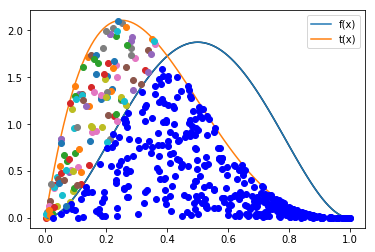

In [56]:
# Función de aceptación y rechazo
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = np.multiply(R2,t_x)<=f_x
    for i in range(len(R1)):
        if condition[i]:
            plt.plot(R1[i],R2[i]*t_x[i],'ob')
        else:
            plt.plot(R1[i],R2[i]*t_x[i],'o')
    plt.show()

N = 500  # número de puntos
# Función objetivo
f = lambda x: 30*(x**2 - 2*x**3 +x**4)
x = np.arange(0,1,0.01)
plt.plot(x,f(x),'k')
c = float(f(optimize.fmin(lambda x:-f(x),0,disp=False)))
print('El máximo de la función es:',c)

x = np.arange(0,1,0.01)
t = lambda x: 20*x*(1-x)**3
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

plt.show()